In [1]:
import sire as sr

In [2]:
url = "https://github.com/michellab/Multiple-Distance-Restraints/raw/" \
      "main/example_input/bound/boresch/template/discharge/input"

In [3]:
mols = sr.load(sr.expand(url, "SYSTEM.top", "SYSTEM.crd"))

In [4]:
mols

System( name=BioSimSpace Syst num_molecules=18575 num_residues=18914 num_atoms=60695 )

In [5]:
mols["water"]

INFO:rdkit:Enabling RDKit 2022.09.4 jupyter extensions


SelectorMol( size=18459
0: Molecule( WAT:6   num_atoms=3 num_residues=1 )
1: Molecule( WAT:7   num_atoms=3 num_residues=1 )
2: Molecule( WAT:8   num_atoms=3 num_residues=1 )
3: Molecule( WAT:9   num_atoms=3 num_residues=1 )
4: Molecule( WAT:10  num_atoms=3 num_residues=1 )
...
18454: Molecule( WAT:18460 num_atoms=3 num_residues=1 )
18455: Molecule( WAT:18461 num_atoms=3 num_residues=1 )
18456: Molecule( WAT:18462 num_atoms=3 num_residues=1 )
18457: Molecule( WAT:18463 num_atoms=3 num_residues=1 )
18458: Molecule( WAT:18464 num_atoms=3 num_residues=1 )
)

In [6]:
mols["protein"]

SelectorMol( size=3
0: Molecule( BioSimSpace Syst:3 num_atoms=1724 num_residues=114 )
1: Molecule( BioSimSpace Syst:4 num_atoms=1724 num_residues=114 )
2: Molecule( BioSimSpace Syst:5 num_atoms=1724 num_residues=114 )
)

In [7]:
mols["not (protein or water)"]

SelectorMol( size=113
0: Molecule( LIG:2   num_atoms=34 num_residues=1 )
1: Molecule( NA:18465 num_atoms=1 num_residues=1 )
2: Molecule( NA:18466 num_atoms=1 num_residues=1 )
3: Molecule( NA:18467 num_atoms=1 num_residues=1 )
4: Molecule( NA:18468 num_atoms=1 num_residues=1 )
...
108: Molecule( CL:18572 num_atoms=1 num_residues=1 )
109: Molecule( CL:18573 num_atoms=1 num_residues=1 )
110: Molecule( CL:18574 num_atoms=1 num_residues=1 )
111: Molecule( CL:18575 num_atoms=1 num_residues=1 )
112: Molecule( CL:18576 num_atoms=1 num_residues=1 )
)

In [8]:
ligand = mols["count(atoms) > 1 and not (protein or water)"]
ligand

Selector<SireMol::Atom>( size=34
0:  Atom( CAB:1   [  46.67,   46.32,   39.01] )
1:  Atom( CAC:2   [  45.40,   46.10,   38.47] )
2:  Atom( CAD:3   [  38.93,   47.09,   48.24] )
3:  Atom( CAE:4   [  40.85,   45.67,   48.76] )
4:  Atom( CAF:5   [  39.20,   47.00,   46.87] )
...
29:  Atom( H08:30  [  47.83,   46.54,   40.80] )
30:  Atom( H09:31  [  43.34,   46.25,   38.78] )
31:  Atom( H10:32  [  46.89,   46.55,   43.06] )
32:  Atom( H11:33  [  42.90,   47.23,   45.54] )
33:  Atom( H12:34  [  39.01,   47.34,   50.61] )
)

In [9]:
ligand.view()

NGLWidget()

In [10]:
ligand.energy()

37.4462 kcal mol-1

In [11]:
ligand.energy().components()

{'1-4_coulomb': 23.0059 kcal mol-1,
 'bond': 3.61085e-08 kcal mol-1,
 'dihedral': 13.224 kcal mol-1,
 'intra_LJ': -2.15026 kcal mol-1,
 'improper': 1.43778 kcal mol-1,
 'intra_coulomb': -29.7164 kcal mol-1,
 'angle': 19.6622 kcal mol-1,
 '1-4_LJ': 11.9829 kcal mol-1}

In [12]:
sr.search.set_token("ligand", "count(atoms) > 1 and not (protein or water)")

In [13]:
residues = mols["(residues within 3 of ligand) and protein"]

In [14]:
residues.molecules()

SelectorMol( size=2
0: Molecule( BioSimSpace Syst:3 num_atoms=1724 num_residues=114 )
1: Molecule( BioSimSpace Syst:5 num_atoms=1724 num_residues=114 )
)

In [15]:
residues.view()

NGLWidget()

In [16]:
data = {"residue": [], "component": [], "energy": []}

for residue, energy in residues.apply(lambda res: (res, res.energy(ligand))):
    resid = f"{residue.name().value()}:{residue.number().value()}"
    
    for component in energy.components():
        data["residue"].append(resid)
        data["component"].append(component)
        data["energy"].append(energy[component].to(sr.units.kcal_per_mol))
    
    data["residue"].append(resid)
    data["component"].append("total")
    data["energy"].append(energy.to(sr.units.kcal_per_mol))

In [17]:
import pandas as pd
df = pd.DataFrame(data)
df

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,residue,component,energy
0,PRT:2,coulomb,-1.871054
1,PRT:2,LJ,-3.929312
2,PRT:2,total,-5.800366
3,MET:3,coulomb,-0.177925
4,MET:3,LJ,-2.531279
5,MET:3,total,-2.709204
6,LYS:33,coulomb,-24.507839
7,LYS:33,LJ,-3.652179
8,LYS:33,total,-28.160018
9,PRO:34,coulomb,0.388650


<AxesSubplot: xlabel='residue'>

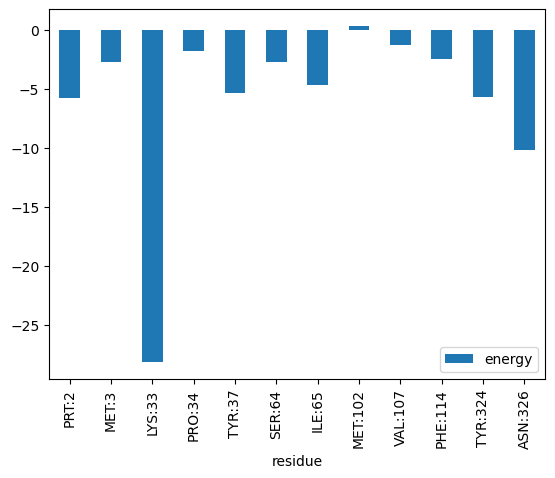

In [18]:
df[ df["component"] == "total" ].plot.bar(x="residue")

<AxesSubplot: xlabel='residue'>

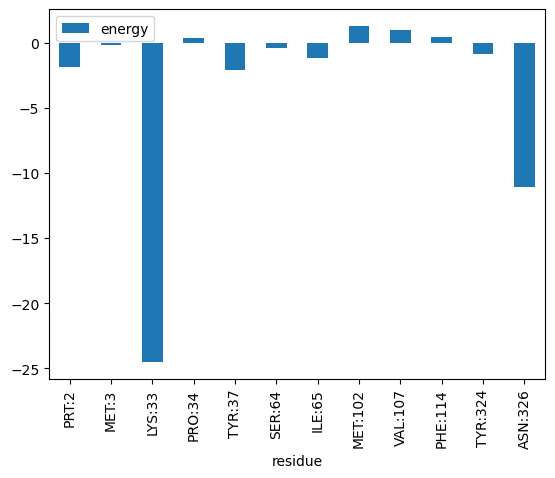

In [19]:
df[ df["component"] == "coulomb" ].plot.bar(x="residue")

In [20]:
mols["ligand or (resname LYS and resnum 33)"].view()

NGLWidget()

In [21]:
closest = (1000 * sr.units.angstrom, None, None)

for atom0 in mols["resname LYS and resnum 33"].atoms():
    for atom1 in ligand:
        dist = sr.measure(atom0, atom1)
        if dist < closest[0]:
            closest = (dist, atom0, atom1)

In [22]:
print(closest)

(2.40007 Å, Atom( HZ1:514 [  40.32,   45.62,   40.87] ), Atom( NAM:18  [  40.97,   46.16,   43.12] ))


In [23]:
closest[1].energy(closest[2]).components()

{'coulomb': -12.7279 kcal mol-1, 'LJ': -0.0355264 kcal mol-1}